In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("talk")

In [2]:
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 출생 데이터
df_birth = pd.read_csv("kr_birth.csv")
df_birth.head(5)

,year,num_birth,sex_ratio
0,1973,965521,104.6
1,1974,922823,109.4
2,1975,874030,112.4
3,1976,796331,110.7
4,1977,825339,104.2


In [4]:
# 수능 데이터
df_sn = pd.read_csv("df_sn.csv")
df_sn.head(5)

,year,male,female,enroll,grad,ged,apply,exam,apply_rate
0,1994,437465,305203,521806,213459,7403,742668,716326,96.5
1,1994,444612,305569,496617,243826,9738,750181,726634,96.9
2,1995,452360,329389,477960,261492,42297,781749,757488,96.9
3,1996,478707,361954,526833,300482,13346,840661,809867,96.3
4,1997,472527,351847,545023,268044,11307,824374,795338,96.5


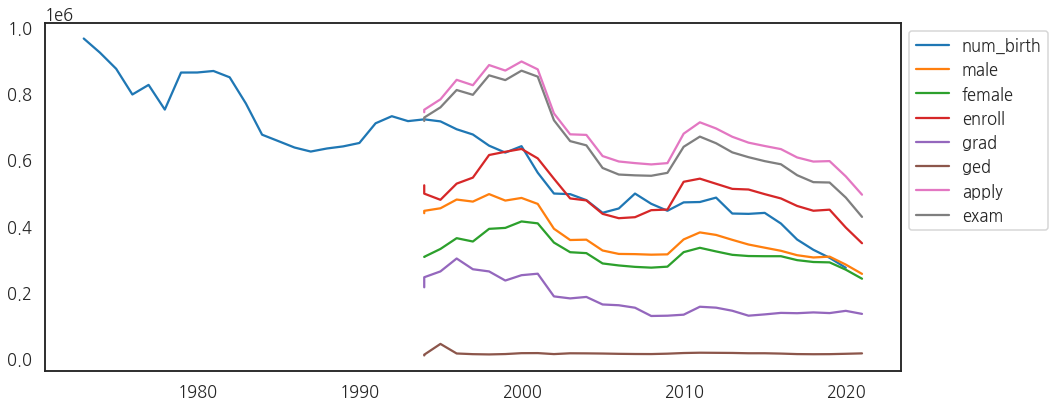

In [5]:
# 아무렇게나 plot

birth_cols = list(df_birth.columns)
sn_cols = list(df_sn.columns)
cols = birth_cols[1:] + sn_cols[1:]

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

for col in birth_cols[1:-1]:
    ax.plot(df_birth["year"], df_birth[col], label=col)
    
for col in sn_cols[1:-1]:
    ax.plot(df_sn["year"], df_sn[col], label=col)    
    
ax.legend(loc="upper left", bbox_to_anchor=(1, 1)) 
fig.tight_layout()

fig.savefig("64_kr_pop_sn_01.png")

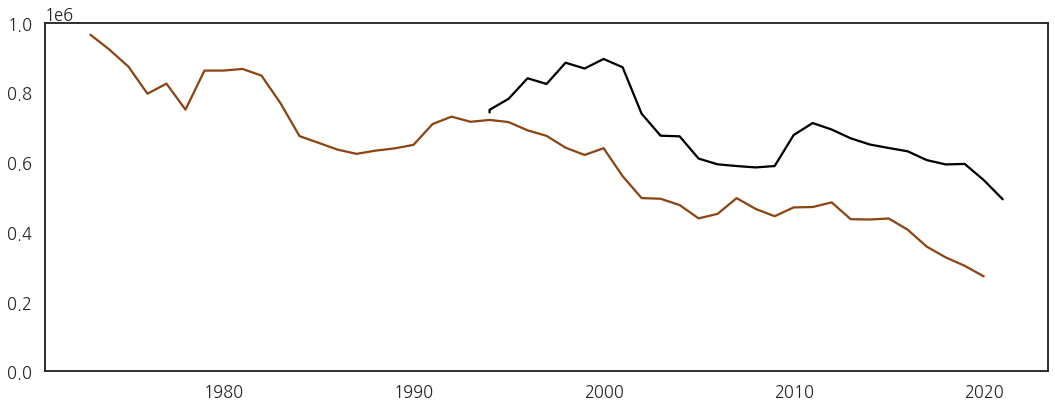

In [6]:
# step 1. 그림 설정, 출생자 수와 수능 지원자 출력, y축 0부터 시작

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# 출생자 수
color_birth = "saddlebrown"
ax.plot(df_birth["year"], df_birth["num_birth"], c=color_birth)

# 수능 지원자 수
color_sn = "k"
ax.plot(df_sn["year"], df_sn["apply"], c=color_sn)

# y축 범위 지정
ax.set_ylim(0, )

fig.tight_layout()
fig.savefig("64_kr_pop_sn_02.png")

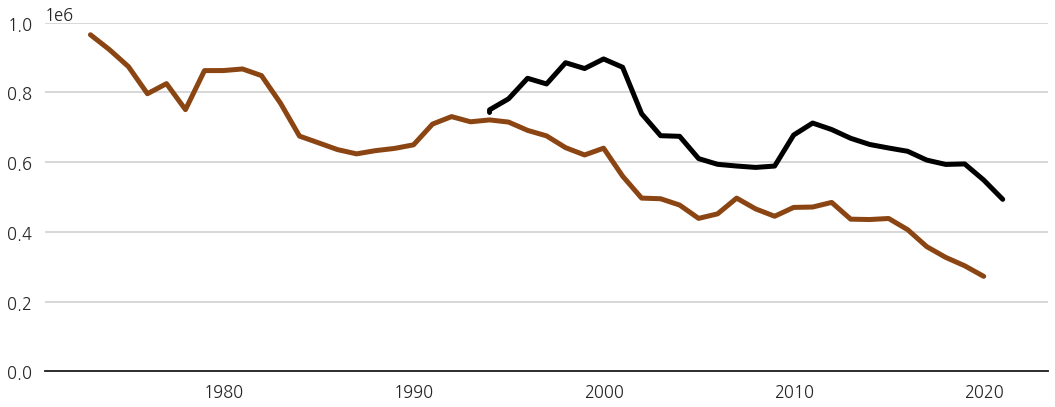

In [7]:
# step 2. spines 정리, grid 추가, 선 굵게

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# 출생자 수
color_birth = "saddlebrown"
ax.plot(df_birth["year"], df_birth["num_birth"], c=color_birth, lw=5)

# 수능 지원자 수
color_sn = "k"
ax.plot(df_sn["year"], df_sn["apply"], c=color_sn, lw=5)

# spines 정리
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)

# y축 범위 지정
ax.set_ylim(0, )    
    
# grid 추가
ax.grid(axis="y")

fig.tight_layout()
fig.savefig("64_kr_pop_sn_03.png")

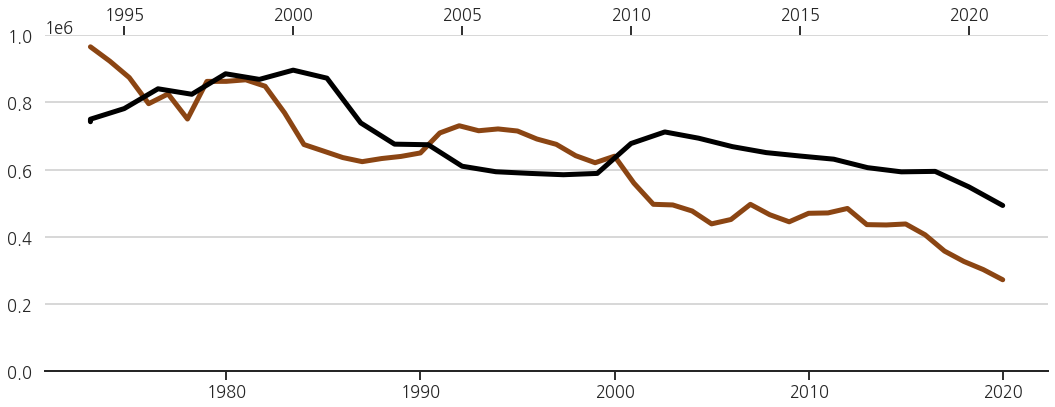

In [8]:
# step 3. 출생년도와 수능 학년도를 맞추기 위한 axes 추가

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# axes 추가
ax_sn = ax.twiny()

# 출생자 수
color_birth = "saddlebrown"
ax.plot(df_birth["year"], df_birth["num_birth"], c=color_birth, lw=5)

# 수능 지원자 수
color_sn = "k"
ax_sn.plot(df_sn["year"], df_sn["apply"], c=color_sn, lw=5)

# spines 정리
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)
    ax_sn.spines[s].set_visible(False)
    
# y축 범위 지정
ax.set_ylim(0, )
    
# grid 추가
ax.grid(axis="y")

fig.tight_layout()
fig.savefig("64_kr_pop_sn_04.png")

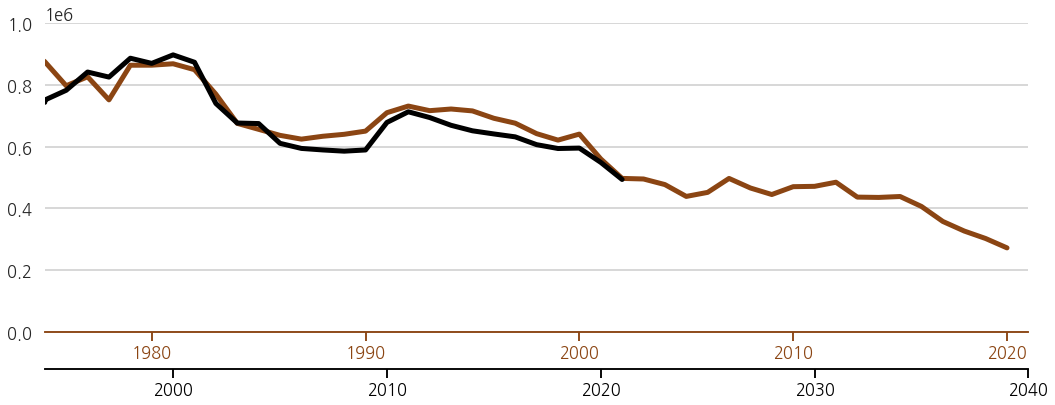

In [9]:
# step 4. 수능 학년도 xtick을 bottom spine으로 옮기고 출생년도와 수능 학년도 scale 맞춤, -19 shift

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# axes 추가
ax_sn = ax.twiny()

# 출생자 수
color_birth = "saddlebrown"
ax.plot(df_birth["year"], df_birth["num_birth"], c=color_birth, lw=5)

# 수능 지원자 수
color_sn = "k"
ax_sn.plot(df_sn["year"], df_sn["apply"], c=color_sn, lw=5)

# spines 정리
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)
    ax_sn.spines[s].set_visible(False)

# 출생 x, y축 범위 지정
ax.set_xlim(1975, 2021)
ax.set_ylim(0, )    

# 수능 x, y 축 범위 지정
offset_sn = 19
ax_sn.set_xlim(1975+offset_sn, 2021+offset_sn)
    
# grid 추가
ax.grid(axis="y")

# 출생년도 bottom spine 색상을 line plot과 통일
ax.spines["bottom"].set_edgecolor(color_birth)
ax.tick_params(axis="x", color=color_birth, labelcolor=color_birth)

# 수능 학년도 xticks를 bottom으로 이동
ax_sn.xaxis.set_ticks_position("bottom")

# 수능 학년도 bottom spine을 아래로 이동, 수능 곡선 색상과 통일
ax_sn.spines["bottom"].set_position(("axes", -0.12))
ax_sn.spines["bottom"].set_edgecolor(color_sn)
ax_sn.tick_params(color=color_sn, labelcolor=color_sn)

fig.tight_layout()
fig.savefig("64_kr_pop_sn_05.png")

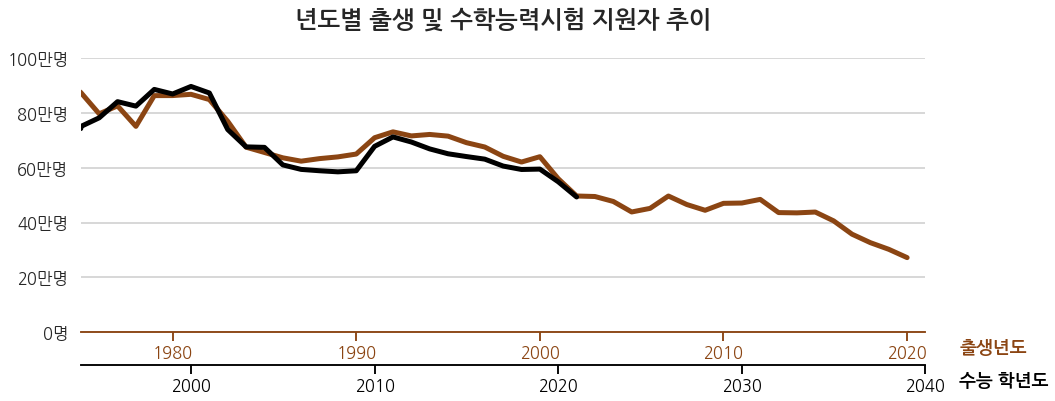

In [10]:
# step 5. x, y축 ticklabels, labels, title 달기

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# axes 추가
ax_sn = ax.twiny()

# 출생자 수
color_birth = "saddlebrown"
ax.plot(df_birth["year"], df_birth["num_birth"], c=color_birth, lw=5)

# 수능 지원자 수
color_sn = "k"
ax_sn.plot(df_sn["year"], df_sn["apply"], c=color_sn, lw=5)

# spines 정리
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)
    ax_sn.spines[s].set_visible(False)

# 출생 x, y축 범위 지정
ax.set_xlim(1975, 2021)
ax.set_ylim(0, )    

# 수능 x, y 축 범위 지정
offset_sn = 19
ax_sn.set_xlim(1975+offset_sn, 2021+offset_sn)
    
# grid 추가
ax.grid(axis="y")

# 출생년도 bottom spine 색상을 line plot과 통일
ax.spines["bottom"].set_edgecolor(color_birth)
ax.tick_params(axis="x", color=color_birth, labelcolor=color_birth)

# 수능 학년도 xticks를 bottom으로 이동
ax_sn.xaxis.set_ticks_position("bottom")

# 수능 학년도 bottom spine을 아래로 이동, 수능 곡선 색상과 통일
ax_sn.spines["bottom"].set_position(("axes", -0.12))
ax_sn.spines["bottom"].set_edgecolor(color_sn)
ax_sn.tick_params(color=color_sn, labelcolor=color_sn)

# yticklabels
yticks = list(np.linspace(0, 1e6, 6))
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y/1e4)}만명" if y > 0 else "0명" for y in yticks])

# xticklabels
font_xlabel = {"fontsize":18, "ha":"left", "fontweight":"bold"}
ax.text(1.04, -0.075, "출생년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)
ax.text(1.04, -0.195, "수능 학년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

# title
ax.set_title("년도별 출생 및 수학능력시험 지원자 추이", fontsize=24, fontweight="bold", pad=32)

fig.tight_layout()
fig.savefig("64_kr_pop_sn_06.png")

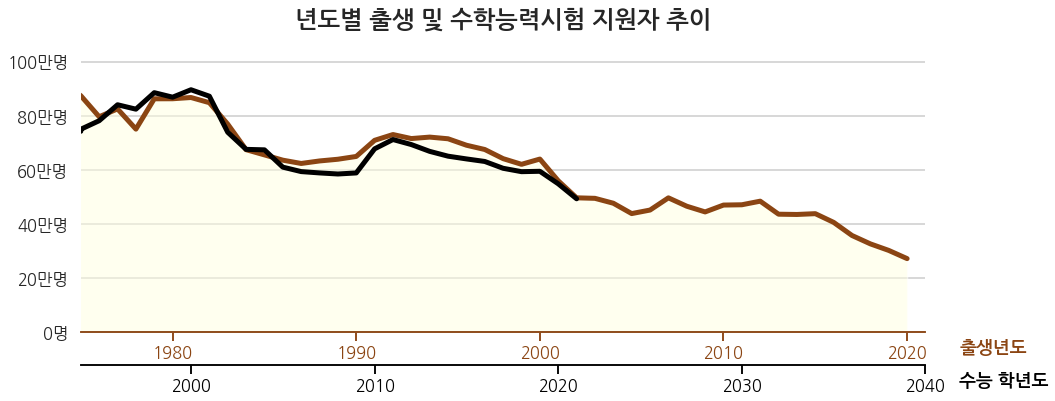

In [11]:
# step 6. 출생자 수 강조 : 색 칠하기

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# axes 추가
ax_sn = ax.twiny()

# 출생자 수
color_birth = "saddlebrown"
ax.fill_between(df_birth["year"], df_birth["num_birth"], fc="lightyellow", label="출생", alpha=0.5)
ax.plot(df_birth["year"], df_birth["num_birth"], c=color_birth, lw=5)

# 수능 지원자 수
color_sn = "k"
ax_sn.plot(df_sn["year"], df_sn["apply"], c=color_sn, lw=5)

# spines 정리
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)
    ax_sn.spines[s].set_visible(False)

# 출생 x, y축 범위 지정
ax.set_xlim(1975, 2021)
ax.set_ylim(0, )    

# 수능 x, y 축 범위 지정
offset_sn = 19
ax_sn.set_xlim(1975+offset_sn, 2021+offset_sn)
    
# grid 추가
ax.grid(axis="y")

# 출생년도 bottom spine 색상을 line plot과 통일
ax.spines["bottom"].set_edgecolor(color_birth)
ax.tick_params(axis="x", color=color_birth, labelcolor=color_birth)

# 수능 학년도 xticks를 bottom으로 이동
ax_sn.xaxis.set_ticks_position("bottom")

# 수능 학년도 bottom spine을 아래로 이동, 수능 곡선 색상과 통일
ax_sn.spines["bottom"].set_position(("axes", -0.12))
ax_sn.spines["bottom"].set_edgecolor(color_sn)
ax_sn.tick_params(color=color_sn, labelcolor=color_sn)

# yticklabels
yticks = list(np.linspace(0, 1e6, 6))
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y/1e4)}만명" if y > 0 else "0명" for y in yticks])

# xticklabels
font_xlabel = {"fontsize":18, "ha":"left", "fontweight":"bold"}
ax.text(1.04, -0.075, "출생년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)
ax.text(1.04, -0.195, "수능 학년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

# title
ax.set_title("년도별 출생 및 수학능력시험 지원자 추이", fontsize=24, fontweight="bold", pad=32)

fig.tight_layout()
fig.savefig("64_kr_pop_sn_07.png")

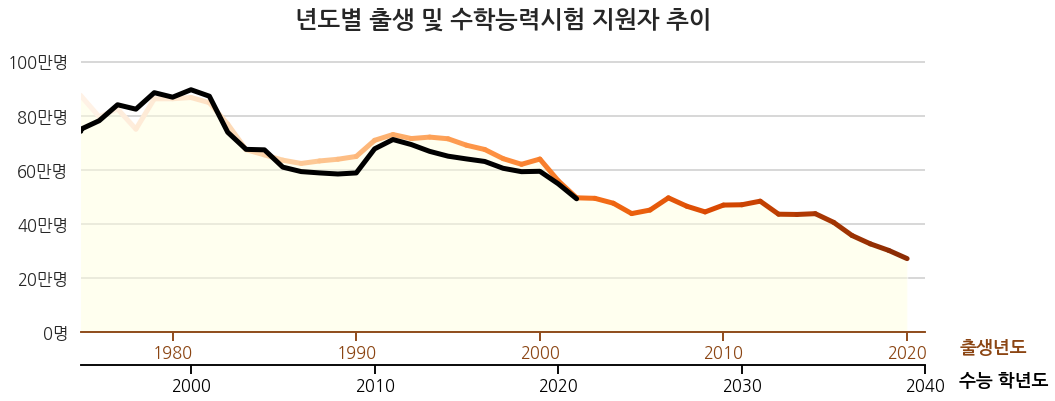

In [12]:
# step 7. 출생자 수 변화 강조 : 선을 그라데이션으로 바꾸기
from matplotlib import cm

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# axes 추가
ax_sn = ax.twiny()

# 출생자 수
color_birth = "saddlebrown"
ax.fill_between(df_birth["year"], df_birth["num_birth"], fc="lightyellow", label="출생", alpha=0.5)
oranges = cm.get_cmap("Oranges_r", lut=df_birth.shape[0])
for i, alpha in enumerate(range(df_birth.shape[0]-1)):
    ax.plot(df_birth.loc[i: i+1, "year"], df_birth.loc[i:i+1, "num_birth"], c=oranges(df_birth.shape[0]-i), lw=5)

# 수능 지원자 수
color_sn = "k"
ax_sn.plot(df_sn["year"], df_sn["apply"], c=color_sn, lw=5)

# spines 정리
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)
    ax_sn.spines[s].set_visible(False)

# 출생 x, y축 범위 지정
ax.set_xlim(1975, 2021)
ax.set_ylim(0, )    

# 수능 x, y 축 범위 지정
offset_sn = 19
ax_sn.set_xlim(1975+offset_sn, 2021+offset_sn)
    
# grid 추가
ax.grid(axis="y")

# 출생년도 bottom spine 색상을 line plot과 통일
ax.spines["bottom"].set_edgecolor(color_birth)
ax.tick_params(axis="x", color=color_birth, labelcolor=color_birth)

# 수능 학년도 xticks를 bottom으로 이동
ax_sn.xaxis.set_ticks_position("bottom")

# 수능 학년도 bottom spine을 아래로 이동, 수능 곡선 색상과 통일
ax_sn.spines["bottom"].set_position(("axes", -0.12))
ax_sn.spines["bottom"].set_edgecolor(color_sn)
ax_sn.tick_params(color=color_sn, labelcolor=color_sn)

# yticklabels
yticks = list(np.linspace(0, 1e6, 6))
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y/1e4)}만명" if y > 0 else "0명" for y in yticks])

# xticklabels
font_xlabel = {"fontsize":18, "ha":"left", "fontweight":"bold"}
ax.text(1.04, -0.075, "출생년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)
ax.text(1.04, -0.195, "수능 학년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

# title
ax.set_title("년도별 출생 및 수학능력시험 지원자 추이", fontsize=24, fontweight="bold", pad=32)

fig.tight_layout()
fig.savefig("64_kr_pop_sn_08.png")

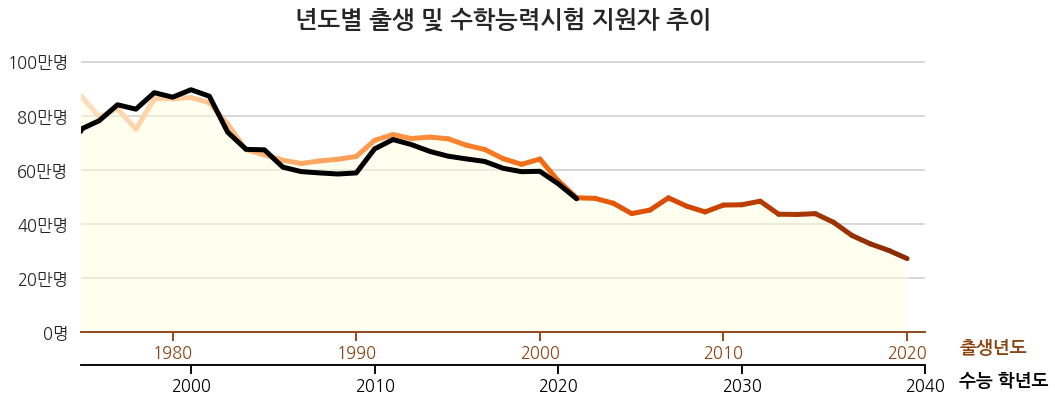

In [13]:
# step 8. 출생자 수 변화 강조 : 그라데이션 끄트머리 명도 조정
from matplotlib import cm

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# axes 추가
ax_sn = ax.twiny()

# 출생자 수
color_birth = "saddlebrown"
ax.fill_between(df_birth["year"], df_birth["num_birth"], fc="lightyellow", label="출생", alpha=0.5)
oranges = cm.get_cmap("Oranges_r", lut=df_birth.shape[0]*1.2)
for i, alpha in enumerate(range(df_birth.shape[0]-1)):
    ax.plot(df_birth.loc[i: i+1, "year"], df_birth.loc[i:i+1, "num_birth"], c=oranges(df_birth.shape[0]-i), lw=5)

# 수능 지원자 수
color_sn = "k"
ax_sn.plot(df_sn["year"], df_sn["apply"], c=color_sn, lw=5)

# spines 정리
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)
    ax_sn.spines[s].set_visible(False)

# 출생 x, y축 범위 지정
ax.set_xlim(1975, 2021)
ax.set_ylim(0, )    

# 수능 x, y 축 범위 지정
offset_sn = 19
ax_sn.set_xlim(1975+offset_sn, 2021+offset_sn)
    
# grid 추가
ax.grid(axis="y")

# 출생년도 bottom spine 색상을 line plot과 통일
ax.spines["bottom"].set_edgecolor(color_birth)
ax.tick_params(axis="x", color=color_birth, labelcolor=color_birth)

# 수능 학년도 xticks를 bottom으로 이동
ax_sn.xaxis.set_ticks_position("bottom")

# 수능 학년도 bottom spine을 아래로 이동, 수능 곡선 색상과 통일
ax_sn.spines["bottom"].set_position(("axes", -0.12))
ax_sn.spines["bottom"].set_edgecolor(color_sn)
ax_sn.tick_params(color=color_sn, labelcolor=color_sn)

# yticklabels
yticks = list(np.linspace(0, 1e6, 6))
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y/1e4)}만명" if y > 0 else "0명" for y in yticks])

# xticklabels
font_xlabel = {"fontsize":18, "ha":"left", "fontweight":"bold"}
ax.text(1.04, -0.075, "출생년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)
ax.text(1.04, -0.195, "수능 학년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

# title
ax.set_title("년도별 출생 및 수학능력시험 지원자 추이", fontsize=24, fontweight="bold", pad=32)

fig.tight_layout()
fig.savefig("64_kr_pop_sn_09.png")

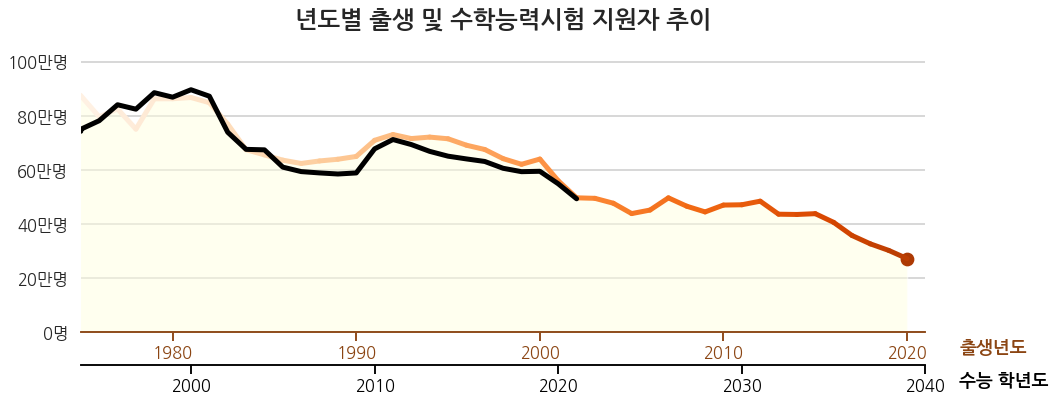

In [14]:
# step 9. 출생자 수 변화 강조 : 마지막 지점 동그라미
from matplotlib import cm

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# axes 추가
ax_sn = ax.twiny()

# 출생자 수
color_birth = "saddlebrown"
ax.fill_between(df_birth["year"], df_birth["num_birth"], fc="lightyellow", label="출생", alpha=0.5)
oranges = cm.get_cmap("Oranges", lut=df_birth.shape[0]*1.2)
for i, alpha in enumerate(range(df_birth.shape[0]-1)):
    ax.plot(df_birth.loc[i: i+1, "year"], df_birth.loc[i:i+1, "num_birth"], c=oranges(i), lw=5)
ax.scatter(df_birth["year"].tail(1), df_birth["num_birth"].tail(1), s=150, c=[oranges(df_birth.shape[0])])
    
# 수능 지원자 수
color_sn = "k"
ax_sn.plot(df_sn["year"], df_sn["apply"], c=color_sn, lw=5)

# spines 정리
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)
    ax_sn.spines[s].set_visible(False)

# 출생 x, y축 범위 지정
ax.set_xlim(1975, 2021)
ax.set_ylim(0, )    

# 수능 x, y 축 범위 지정
offset_sn = 19
ax_sn.set_xlim(1975+offset_sn, 2021+offset_sn)
    
# grid 추가
ax.grid(axis="y")

# 출생년도 bottom spine 색상을 line plot과 통일
ax.spines["bottom"].set_edgecolor(color_birth)
ax.tick_params(axis="x", color=color_birth, labelcolor=color_birth)

# 수능 학년도 xticks를 bottom으로 이동
ax_sn.xaxis.set_ticks_position("bottom")

# 수능 학년도 bottom spine을 아래로 이동, 수능 곡선 색상과 통일
ax_sn.spines["bottom"].set_position(("axes", -0.12))
ax_sn.spines["bottom"].set_edgecolor(color_sn)
ax_sn.tick_params(color=color_sn, labelcolor=color_sn)

# yticklabels
yticks = list(np.linspace(0, 1e6, 6))
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y/1e4)}만명" if y > 0 else "0명" for y in yticks])

# xticklabels
font_xlabel = {"fontsize":18, "ha":"left", "fontweight":"bold"}
ax.text(1.04, -0.075, "출생년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)
ax.text(1.04, -0.195, "수능 학년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

# title
ax.set_title("년도별 출생 및 수학능력시험 지원자 추이", fontsize=24, fontweight="bold", pad=32)

fig.tight_layout()
fig.savefig("64_kr_pop_sn_10.png")

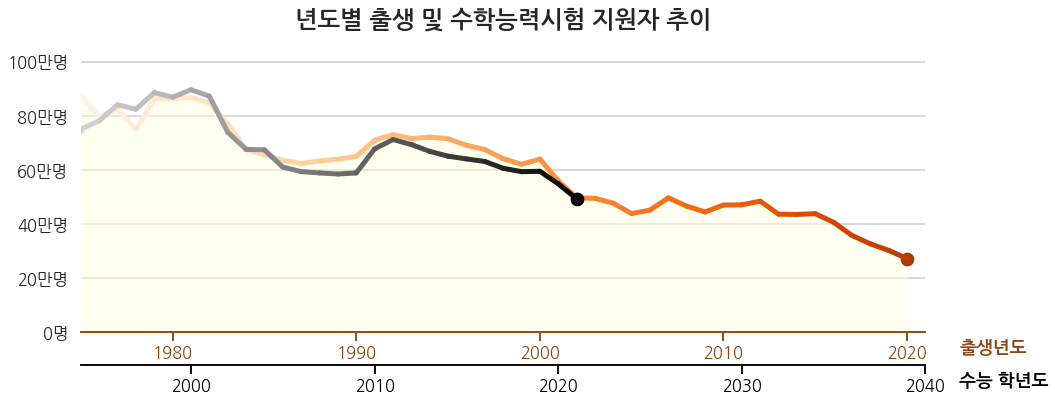

In [15]:
# step 10. 수능 지원자 수 변화 강조
from matplotlib import cm

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# axes 추가
ax_sn = ax.twiny()

# 출생자 수
color_birth = "saddlebrown"
ax.fill_between(df_birth["year"], df_birth["num_birth"], fc="lightyellow", alpha=0.5)
oranges = cm.get_cmap("Oranges", lut=df_birth.shape[0]*1.2)
for i, alpha in enumerate(range(df_birth.shape[0]-1)):
    ax.plot(df_birth.loc[i: i+1, "year"], df_birth.loc[i:i+1, "num_birth"], c=oranges(i), lw=5)
ax.scatter(df_birth["year"].tail(1), df_birth["num_birth"].tail(1), s=150, c=[oranges(df_birth.shape[0])])
    
# 수능 지원자 수
color_sn = "k"
greys = cm.get_cmap("Greys", lut=df_sn.shape[0] + 10)
for i, alpha in enumerate(range(df_sn.shape[0]-1)):
    ax_sn.plot(df_sn.loc[i: i+1, "year"], df_sn.loc[i:i+1, "apply"], c=greys(i + 10), lw=5)
ax_sn.scatter(df_sn["year"].tail(1), df_sn["apply"].tail(1), s=150, c=color_sn)

# spines 정리
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)
    ax_sn.spines[s].set_visible(False)

# 출생 x, y축 범위 지정
ax.set_xlim(1975, 2021)
ax.set_ylim(0, )    

# 수능 x, y 축 범위 지정
offset_sn = 19
ax_sn.set_xlim(1975+offset_sn, 2021+offset_sn)
    
# grid 추가
ax.grid(axis="y")

# 출생년도 bottom spine 색상을 line plot과 통일
ax.spines["bottom"].set_edgecolor(color_birth)
ax.tick_params(axis="x", color=color_birth, labelcolor=color_birth)

# 수능 학년도 xticks를 bottom으로 이동
ax_sn.xaxis.set_ticks_position("bottom")

# 수능 학년도 bottom spine을 아래로 이동, 수능 곡선 색상과 통일
ax_sn.spines["bottom"].set_position(("axes", -0.12))
ax_sn.spines["bottom"].set_edgecolor(color_sn)
ax_sn.tick_params(color=color_sn, labelcolor=color_sn)

# yticklabels
yticks = list(np.linspace(0, 1e6, 6))
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y/1e4)}만명" if y > 0 else "0명" for y in yticks])

# xticklabels
font_xlabel = {"fontsize":18, "ha":"left", "fontweight":"bold"}
ax.text(1.04, -0.075, "출생년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)
ax.text(1.04, -0.195, "수능 학년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

# title
ax.set_title("년도별 출생 및 수학능력시험 지원자 추이", fontsize=24, fontweight="bold", pad=32)

fig.tight_layout()
fig.savefig("64_kr_pop_sn_11.png")

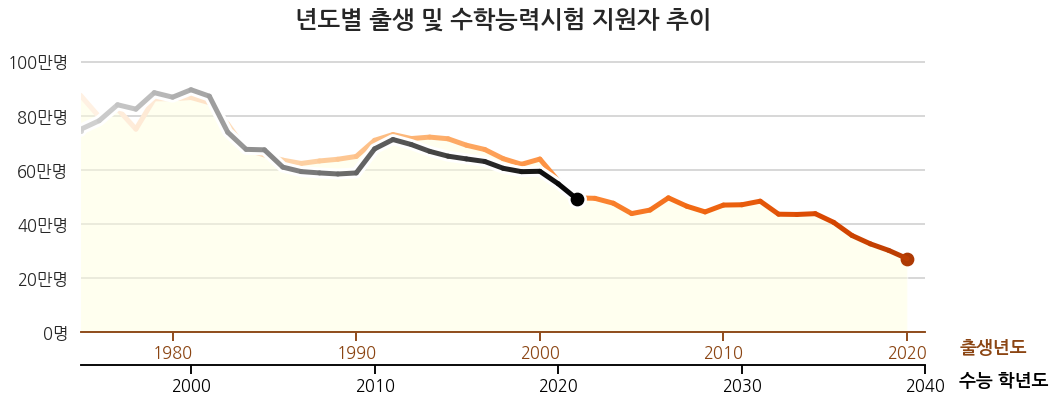

In [16]:
# step 11. 수능 지원자 수 변화 잘 보이게 배경깔기
from matplotlib import cm

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# axes 추가
ax_sn = ax.twiny()

# 출생자 수
color_birth = "saddlebrown"
ax.fill_between(df_birth["year"], df_birth["num_birth"], fc="lightyellow", alpha=0.5)
oranges = cm.get_cmap("Oranges", lut=df_birth.shape[0]*1.2)
for i, alpha in enumerate(range(df_birth.shape[0]-1)):
    ax.plot(df_birth.loc[i: i+1, "year"], df_birth.loc[i:i+1, "num_birth"], c=oranges(i), lw=5)
ax.scatter(df_birth["year"].tail(1), df_birth["num_birth"].tail(1), s=150, c=[oranges(df_birth.shape[0])])
    
# 수능 지원자 수
color_sn = "k"
greys = cm.get_cmap("Greys", lut=df_sn.shape[0] + 10)
for i, alpha in enumerate(range(df_sn.shape[0]-1)):
    ax_sn.plot(df_sn.loc[i: i+1, "year"], df_sn.loc[i:i+1, "apply"], c=greys(i + 10), lw=5, zorder=3)
ax_sn.scatter(df_sn["year"].tail(1), df_sn["apply"].tail(1), s=150, c=color_sn, zorder=3.1)

# 수능 지원자 수 윤곽선
ax_sn.plot(df_sn["year"], df_sn["apply"], c="w", lw=11, zorder=2)
ax_sn.scatter(df_sn["year"].tail(1), df_sn["apply"].tail(1), s=300, c="w", zorder=2)

# spines 정리
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)
    ax_sn.spines[s].set_visible(False)

# 출생 x, y축 범위 지정
ax.set_xlim(1975, 2021)
ax.set_ylim(0, )    

# 수능 x, y 축 범위 지정
offset_sn = 19
ax_sn.set_xlim(1975+offset_sn, 2021+offset_sn)
    
# grid 추가
ax.grid(axis="y")

# 출생년도 bottom spine 색상을 line plot과 통일
ax.spines["bottom"].set_edgecolor(color_birth)
ax.tick_params(axis="x", color=color_birth, labelcolor=color_birth)

# 수능 학년도 xticks를 bottom으로 이동
ax_sn.xaxis.set_ticks_position("bottom")

# 수능 학년도 bottom spine을 아래로 이동, 수능 곡선 색상과 통일
ax_sn.spines["bottom"].set_position(("axes", -0.12))
ax_sn.spines["bottom"].set_edgecolor(color_sn)
ax_sn.tick_params(color=color_sn, labelcolor=color_sn)

# yticklabels
yticks = list(np.linspace(0, 1e6, 6))
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y/1e4)}만명" if y > 0 else "0명" for y in yticks])

# xticklabels
font_xlabel = {"fontsize":18, "ha":"left", "fontweight":"bold"}
ax.text(1.04, -0.075, "출생년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)
ax.text(1.04, -0.195, "수능 학년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

# title
ax.set_title("년도별 출생 및 수학능력시험 지원자 추이", fontsize=24, fontweight="bold", pad=32)

fig.tight_layout()
fig.savefig("64_kr_pop_sn_12.png")

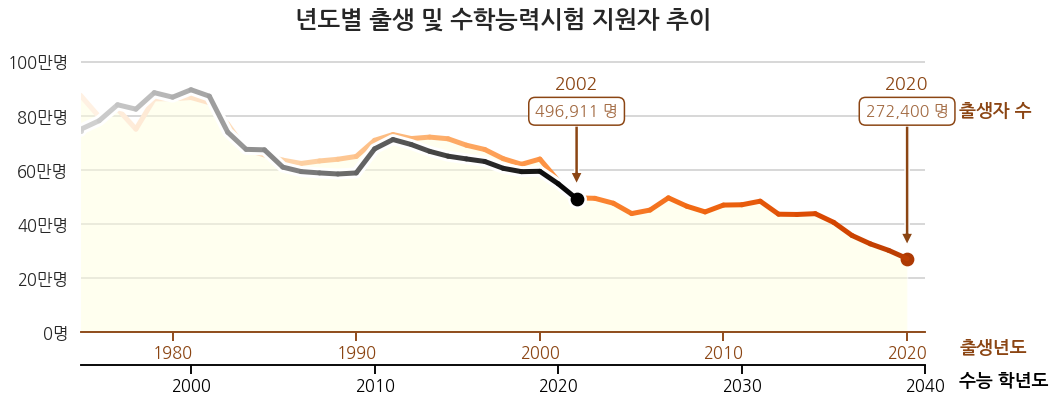

In [17]:
# step 12. 2002년 출생(2021학년도 수능 지원자)데이터 표기, 2020년 출생자로 2039학년도 지원자 예상
from matplotlib import cm

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# axes 추가
ax_sn = ax.twiny()

# 출생자 수
color_birth = "saddlebrown"
ax.fill_between(df_birth["year"], df_birth["num_birth"], fc="lightyellow", alpha=0.5)
oranges = cm.get_cmap("Oranges", lut=df_birth.shape[0]*1.2)
for i, alpha in enumerate(range(df_birth.shape[0]-1)):
    ax.plot(df_birth.loc[i: i+1, "year"], df_birth.loc[i:i+1, "num_birth"], c=oranges(i), lw=5)
ax.scatter(df_birth["year"].tail(1), df_birth["num_birth"].tail(1), s=150, c=[oranges(df_birth.shape[0])])
    
# 수능 지원자 수
color_sn = "k"
greys = cm.get_cmap("Greys", lut=df_sn.shape[0] + 10)
for i, alpha in enumerate(range(df_sn.shape[0]-1)):
    ax_sn.plot(df_sn.loc[i: i+1, "year"], df_sn.loc[i:i+1, "apply"], c=greys(i + 10), lw=5, zorder=3)
ax_sn.scatter(df_sn["year"].tail(1), df_sn["apply"].tail(1), s=150, c=color_sn, zorder=3.1)

# 수능 지원자 수 윤곽선
ax_sn.plot(df_sn["year"], df_sn["apply"], c="w", lw=11, zorder=2)
ax_sn.scatter(df_sn["year"].tail(1), df_sn["apply"].tail(1), s=300, c="w", zorder=2)

# spines 정리
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)
    ax_sn.spines[s].set_visible(False)

# 출생 x, y축 범위 지정
ax.set_xlim(1975, 2021)
ax.set_ylim(0, )    

# 수능 x, y 축 범위 지정
offset_sn = 19
ax_sn.set_xlim(1975+offset_sn, 2021+offset_sn)
    
# grid 추가
ax.grid(axis="y")

# 출생년도 bottom spine 색상을 line plot과 통일
ax.spines["bottom"].set_edgecolor(color_birth)
ax.tick_params(axis="x", color=color_birth, labelcolor=color_birth)

# 수능 학년도 xticks를 bottom으로 이동
ax_sn.xaxis.set_ticks_position("bottom")

# 수능 학년도 bottom spine을 아래로 이동, 수능 곡선 색상과 통일
ax_sn.spines["bottom"].set_position(("axes", -0.12))
ax_sn.spines["bottom"].set_edgecolor(color_sn)
ax_sn.tick_params(color=color_sn, labelcolor=color_sn)

# yticklabels
yticks = list(np.linspace(0, 1e6, 6))
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y/1e4)}만명" if y > 0 else "0명" for y in yticks])

# xticklabels
font_xlabel = {"fontsize":18, "ha":"left", "fontweight":"bold"}
ax.text(1.04, -0.075, "출생년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)
ax.text(1.04, -0.195, "수능 학년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

# title
ax.set_title("년도별 출생 및 수학능력시험 지원자 추이", fontsize=24, fontweight="bold", pad=32)

# 2002년(index 29), 2020년(index 47) 출생자 데이터 추가
font_annot = {"ha":"center", "fontsize":16, "color":"k", "alpha":0.8}
font_textyear = {"fontsize": 18, "ha":"center"}

for idx in [29, 47]:
    ax.annotate(format(df_birth.loc[idx, "num_birth"], ",") + " 명", 
                xy=(df_birth.loc[idx, "year"], df_birth.loc[idx, "num_birth"]+50000), 
                xytext=(df_birth.loc[idx, "year"], 800000),
                arrowprops={"facecolor":color_birth},
                bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":color_birth},
                ha="center", fontsize=16, 
                color=color_birth, alpha=0.8
               )
    ax.text(df_birth.loc[idx, "year"], 900000, str(df_birth.loc[idx, "year"]), transform=ax.transData, fontdict=font_textyear, color=color_birth)

ax.text(1.04, 0.79, "출생자 수", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)

fig.tight_layout()
fig.savefig("64_kr_pop_sn_13.png")

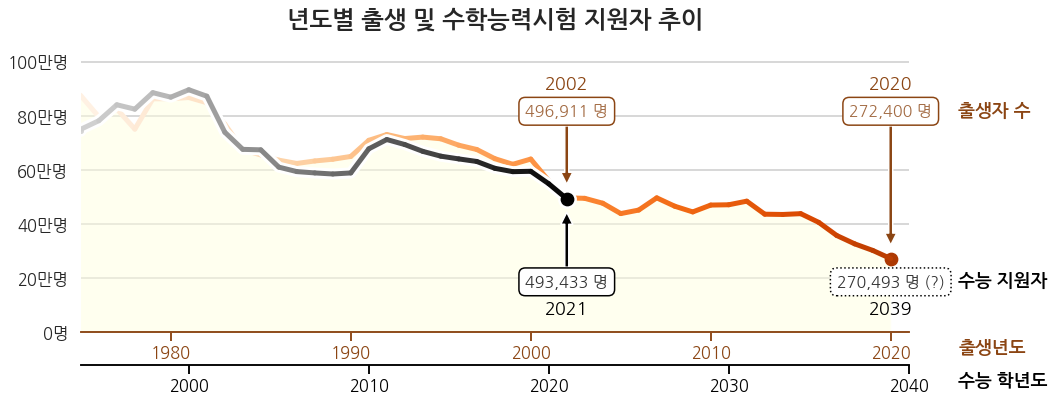

In [18]:
# step 13. 2002년 출생(2021학년도 수능 지원자)데이터 표기, 2020년 출생자로 2039학년도 지원자 예상
from matplotlib import cm

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# axes 추가
ax_sn = ax.twiny()

# 출생자 수
color_birth = "saddlebrown"
ax.fill_between(df_birth["year"], df_birth["num_birth"], fc="lightyellow", alpha=0.5)
oranges = cm.get_cmap("Oranges", lut=df_birth.shape[0]*1.2)
for i, alpha in enumerate(range(df_birth.shape[0]-1)):
    ax.plot(df_birth.loc[i: i+1, "year"], df_birth.loc[i:i+1, "num_birth"], c=oranges(i), lw=5)
ax.scatter(df_birth["year"].tail(1), df_birth["num_birth"].tail(1), s=150, c=[oranges(df_birth.shape[0])])
    
# 수능 지원자 수
color_sn = "k"
greys = cm.get_cmap("Greys", lut=df_sn.shape[0] + 10)
for i, alpha in enumerate(range(df_sn.shape[0]-1)):
    ax_sn.plot(df_sn.loc[i: i+1, "year"], df_sn.loc[i:i+1, "apply"], c=greys(i + 10), lw=5, zorder=3)
ax_sn.scatter(df_sn["year"].tail(1), df_sn["apply"].tail(1), s=150, c=color_sn, zorder=3.1)

# 수능 지원자 수 윤곽선
ax_sn.plot(df_sn["year"], df_sn["apply"], c="w", lw=11, zorder=2)
ax_sn.scatter(df_sn["year"].tail(1), df_sn["apply"].tail(1), s=300, c="w", zorder=2)

# spines 정리
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)
    ax_sn.spines[s].set_visible(False)

# 출생 x, y축 범위 지정
ax.set_xlim(1975, 2021)
ax.set_ylim(0, )    

# 수능 x, y 축 범위 지정
offset_sn = 19
ax_sn.set_xlim(1975+offset_sn, 2021+offset_sn)
    
# grid 추가
ax.grid(axis="y")

# 출생년도 bottom spine 색상을 line plot과 통일
ax.spines["bottom"].set_edgecolor(color_birth)
ax.tick_params(axis="x", color=color_birth, labelcolor=color_birth)

# 수능 학년도 xticks를 bottom으로 이동
ax_sn.xaxis.set_ticks_position("bottom")

# 수능 학년도 bottom spine을 아래로 이동, 수능 곡선 색상과 통일
ax_sn.spines["bottom"].set_position(("axes", -0.12))
ax_sn.spines["bottom"].set_edgecolor(color_sn)
ax_sn.tick_params(color=color_sn, labelcolor=color_sn)

# yticklabels
yticks = list(np.linspace(0, 1e6, 6))
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y/1e4)}만명" if y > 0 else "0명" for y in yticks])

# xticklabels
font_xlabel = {"fontsize":18, "ha":"left", "fontweight":"bold"}
ax.text(1.06, -0.075, "출생년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)
ax.text(1.06, -0.195, "수능 학년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

# title
ax.set_title("년도별 출생 및 수학능력시험 지원자 추이", fontsize=24, fontweight="bold", pad=32)

# 2002년(index 29), 2020년(index 47) 출생자 데이터 추가
font_annot = {"ha":"center", "fontsize":16, "color":"k", "alpha":0.8}
font_textyear = {"fontsize": 18, "ha":"center"}
annot_birth_y = 8e5
annot_birth_offset = 5e4
annot_birth_yearoffset = 1e5
for idx in [29, 47]:
    # 출생자
    ax.annotate(format(df_birth.loc[idx, "num_birth"], ",") + " 명", 
                xy=(df_birth.loc[idx, "year"], df_birth.loc[idx, "num_birth"]+annot_birth_offset), 
                xytext=(df_birth.loc[idx, "year"], annot_birth_y),
                arrowprops={"facecolor":color_birth},
                bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":color_birth},
                ha="center", fontsize=16, 
                color=color_birth, alpha=0.8
               )
    ax.text(df_birth.loc[idx, "year"], 
            annot_birth_y + annot_birth_yearoffset, 
            str(df_birth.loc[idx, "year"]), 
            transform=ax.transData, 
            fontdict=font_textyear, 
            color=color_birth)

# 출생자 수 legend    
ax.text(1.06, 0.79, "출생자 수", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)

# 2021학년도 수능 지원자 추가
annot_sn_y = 17e4
annot_sn_offset = -5e4
annot_sn_year_offset = -1e5
ax_sn.annotate(format(df_sn.loc[28, "apply"], ",") + " 명", 
               xy=(df_sn.loc[28, "year"], df_sn.loc[28, "apply"]+annot_sn_offset), 
               xytext=(df_sn.loc[28, "year"], annot_sn_y),
               arrowprops={"facecolor":color_sn},
               bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":color_sn},
               ha="center", fontsize=16, 
               color=color_sn, alpha=0.8
              )
ax_sn.text(2021, 
           annot_sn_y + annot_sn_year_offset, 
           "2021", 
           transform=ax_sn.transData, 
           fontdict=font_textyear, 
           color=color_sn)

# 2002년에서 2020년까지 출생자 감소율
delta_birth_ratio = df_birth.loc[47, "num_birth"]/df_birth.loc[29, "num_birth"]

# 2039학년도 예상 수능 지원자 수
apply_2039 = int(df_sn.loc[28, "apply"] * delta_birth_ratio)

# 2039학년도 예상 수능 지원자 추가
ax_sn.annotate(f"{format(apply_2039, ',')} 명 (?)", 
               xy=(2039, df_birth.loc[47, "num_birth"] + annot_sn_offset), 
               xytext=(2039, annot_sn_y),
               arrowprops={"facecolor":color_sn},
               bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":color_sn, "ls":":"},
               ha="center", fontsize=16, 
               color=color_sn, alpha=0.8
              )
ax_sn.text(2039, 
           annot_sn_y + annot_sn_year_offset, 
           "2039", 
           transform=ax_sn.transData, 
           fontdict=font_textyear, 
           color=color_sn)

# 수능 지원자 legend
ax.text(1.06, 0.17, "수능 지원자", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

fig.tight_layout()
fig.savefig("64_kr_pop_sn_14.png")

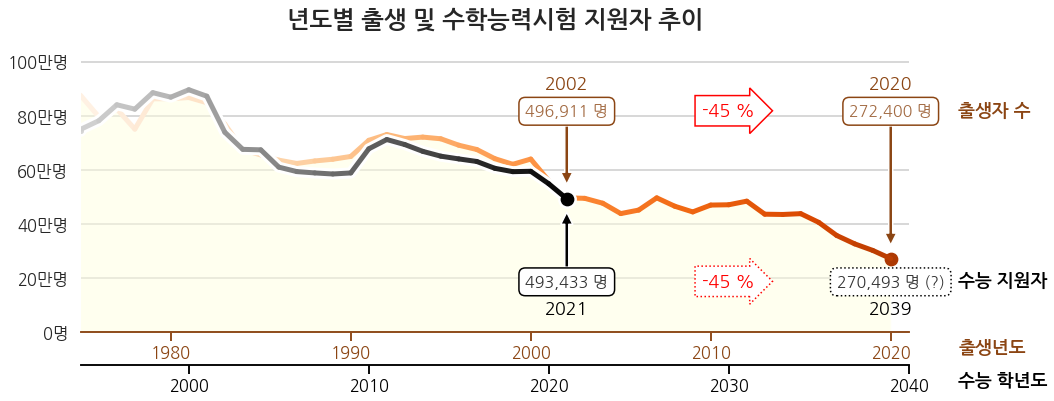

In [19]:
# step 14. 출생률 변화 표기
from matplotlib import cm

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# axes 추가
ax_sn = ax.twiny()

# 출생자 수
color_birth = "saddlebrown"
ax.fill_between(df_birth["year"], df_birth["num_birth"], fc="lightyellow", alpha=0.5)
oranges = cm.get_cmap("Oranges", lut=df_birth.shape[0]*1.2)
for i, alpha in enumerate(range(df_birth.shape[0]-1)):
    ax.plot(df_birth.loc[i: i+1, "year"], df_birth.loc[i:i+1, "num_birth"], c=oranges(i), lw=5)
ax.scatter(df_birth["year"].tail(1), df_birth["num_birth"].tail(1), s=150, c=[oranges(df_birth.shape[0])])
    
# 수능 지원자 수
color_sn = "k"
greys = cm.get_cmap("Greys", lut=df_sn.shape[0] + 10)
for i, alpha in enumerate(range(df_sn.shape[0]-1)):
    ax_sn.plot(df_sn.loc[i: i+1, "year"], df_sn.loc[i:i+1, "apply"], c=greys(i + 10), lw=5, zorder=3)
ax_sn.scatter(df_sn["year"].tail(1), df_sn["apply"].tail(1), s=150, c=color_sn, zorder=3.1)

# 수능 지원자 수 윤곽선
ax_sn.plot(df_sn["year"], df_sn["apply"], c="w", lw=11, zorder=2)
ax_sn.scatter(df_sn["year"].tail(1), df_sn["apply"].tail(1), s=300, c="w", zorder=2)

# spines 정리
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)
    ax_sn.spines[s].set_visible(False)

# 출생 x, y축 범위 지정
ax.set_xlim(1975, 2021)
ax.set_ylim(0, )    

# 수능 x, y 축 범위 지정
offset_sn = 19
ax_sn.set_xlim(1975+offset_sn, 2021+offset_sn)
    
# grid 추가
ax.grid(axis="y")

# 출생년도 bottom spine 색상을 line plot과 통일
ax.spines["bottom"].set_edgecolor(color_birth)
ax.tick_params(axis="x", color=color_birth, labelcolor=color_birth)

# 수능 학년도 xticks를 bottom으로 이동
ax_sn.xaxis.set_ticks_position("bottom")

# 수능 학년도 bottom spine을 아래로 이동, 수능 곡선 색상과 통일
ax_sn.spines["bottom"].set_position(("axes", -0.12))
ax_sn.spines["bottom"].set_edgecolor(color_sn)
ax_sn.tick_params(color=color_sn, labelcolor=color_sn)

# yticklabels
yticks = list(np.linspace(0, 1e6, 6))
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y/1e4)}만명" if y > 0 else "0명" for y in yticks])

# xticklabels
font_xlabel = {"fontsize":18, "ha":"left", "fontweight":"bold"}
ax.text(1.06, -0.075, "출생년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)
ax.text(1.06, -0.195, "수능 학년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

# title
ax.set_title("년도별 출생 및 수학능력시험 지원자 추이", fontsize=24, fontweight="bold", pad=32)

# 2002년(index 29), 2020년(index 47) 출생자 데이터 추가
font_annot = {"ha":"center", "fontsize":16, "color":"k", "alpha":0.8}
font_textyear = {"fontsize": 18, "ha":"center"}
annot_birth_y = 8e5
annot_birth_offset = 5e4
annot_birth_yearoffset = 1e5
for idx in [29, 47]:
    # 출생자
    ax.annotate(format(df_birth.loc[idx, "num_birth"], ",") + " 명", 
                xy=(df_birth.loc[idx, "year"], df_birth.loc[idx, "num_birth"]+annot_birth_offset), 
                xytext=(df_birth.loc[idx, "year"], annot_birth_y),
                arrowprops={"facecolor":color_birth},
                bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":color_birth},
                ha="center", fontsize=16, 
                color=color_birth, alpha=0.8
               )
    ax.text(df_birth.loc[idx, "year"], 
            annot_birth_y + annot_birth_yearoffset, 
            str(df_birth.loc[idx, "year"]), 
            transform=ax.transData, 
            fontdict=font_textyear, 
            color=color_birth)

# 출생자 수 legend    
ax.text(1.06, 0.79, "출생자 수", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)

# 2021학년도 수능 지원자 추가
annot_sn_y = 17e4
annot_sn_offset = -5e4
annot_sn_year_offset = -1e5
ax_sn.annotate(format(df_sn.loc[28, "apply"], ",") + " 명", 
               xy=(df_sn.loc[28, "year"], df_sn.loc[28, "apply"]+annot_sn_offset), 
               xytext=(df_sn.loc[28, "year"], annot_sn_y),
               arrowprops={"facecolor":color_sn},
               bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":color_sn},
               ha="center", fontsize=16, 
               color=color_sn, alpha=0.8
              )
ax_sn.text(2021, 
           annot_sn_y + annot_sn_year_offset, 
           "2021", 
           transform=ax_sn.transData, 
           fontdict=font_textyear, 
           color=color_sn)

# 2002년에서 2020년까지 출생자 감소율
delta_birth_ratio = df_birth.loc[47, "num_birth"]/df_birth.loc[29, "num_birth"]

# 2039학년도 예상 수능 지원자 수
apply_2039 = int(df_sn.loc[28, "apply"] * delta_birth_ratio)

# 2039학년도 예상 수능 지원자 추가
ax_sn.annotate(f"{format(apply_2039, ',')} 명 (?)", 
               xy=(2039, df_birth.loc[47, "num_birth"] + annot_sn_offset), 
               xytext=(2039, annot_sn_y),
               arrowprops={"facecolor":color_sn},
               bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":color_sn, "ls":":"},
               ha="center", fontsize=16, 
               color=color_sn, alpha=0.8
              )
ax_sn.text(2039, 
           annot_sn_y + annot_sn_year_offset, 
           "2039", 
           transform=ax_sn.transData, 
           fontdict=font_textyear, 
           color=color_sn)

# 수능 지원자 legend
ax.text(1.06, 0.17, "수능 지원자", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

# 출생 감소율 추가
change_birth_ratio = f"{delta_birth_ratio*100-100:.0f} %"
change_birth_ratio_pos_birth = (2002 + 2020)/2
ax.text(change_birth_ratio_pos_birth, annot_birth_y, change_birth_ratio,
        fontdict=font_textyear, color="r",
        bbox={"boxstyle":"rarrow", "pad":0.4, "facecolor":"w", "edgecolor":"r"})

# 수능 지원자 예상 감소율 추가
change_birth_ratio_pos_sn = (2021 + 2039)/2
ax_sn.text(change_birth_ratio_pos_sn, annot_sn_y, change_birth_ratio,
           fontdict=font_textyear, color="r",
           bbox={"boxstyle":"rarrow", "pad":0.4, "facecolor":"w", "edgecolor":"r", "linestyle":":"})

fig.tight_layout()
fig.savefig("64_kr_pop_sn_15.png")

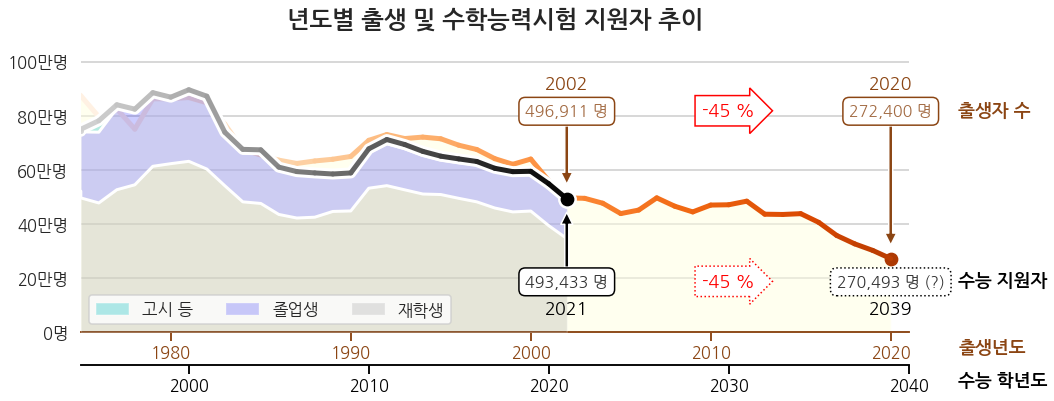

In [20]:
# step 15-1. 수능 지원자 구성 추가
from matplotlib import cm

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# axes 추가
ax_sn = ax.twiny()

# 출생자 수
color_birth = "saddlebrown"
ax.fill_between(df_birth["year"], df_birth["num_birth"], fc="lightyellow", alpha=0.5)
oranges = cm.get_cmap("Oranges", lut=df_birth.shape[0]*1.2)
for i, alpha in enumerate(range(df_birth.shape[0]-1)):
    ax.plot(df_birth.loc[i: i+1, "year"], df_birth.loc[i:i+1, "num_birth"], c=oranges(i), lw=5)
ax.scatter(df_birth["year"].tail(1), df_birth["num_birth"].tail(1), s=150, c=[oranges(df_birth.shape[0])])
    
# 수능 지원자 수
color_sn = "k"
greys = cm.get_cmap("Greys", lut=df_sn.shape[0] + 10)
for i, alpha in enumerate(range(df_sn.shape[0]-1)):
    ax_sn.plot(df_sn.loc[i: i+1, "year"], df_sn.loc[i:i+1, "apply"], c=greys(i + 10), lw=5, zorder=3)
ax_sn.scatter(df_sn["year"].tail(1), df_sn["apply"].tail(1), s=150, c=color_sn, zorder=3.1)

# 수능 지원자 구성
ged = ax_sn.fill_between(df_sn["year"], df_sn["apply"], df_sn["apply"]-df_sn["ged"], 
                         fc="c", alpha=0.3, label="고시 등") # 고시 등
grad = ax_sn.fill_between(df_sn["year"], df_sn["apply"]-df_sn["ged"], df_sn["apply"]-df_sn["ged"]-df_sn["grad"], 
                          fc="b", alpha=0.2, label="졸업생") # 졸업생
enroll = ax_sn.fill_between(df_sn["year"], df_sn["enroll"],
                            fc="gray",alpha=0.2, label="재학생") # 재학생
ax_sn.plot(df_sn["year"], df_sn["apply"]-df_sn["ged"], c="w", lw=3)
ax_sn.plot(df_sn["year"], df_sn["enroll"], c="w", lw=3)


# 수능 지원자 수 윤곽선
ax_sn.plot(df_sn["year"], df_sn["apply"], c="w", lw=11, zorder=2)
ax_sn.scatter(df_sn["year"].tail(1), df_sn["apply"].tail(1), s=300, c="w", zorder=2)

# spines 정리
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)
    ax_sn.spines[s].set_visible(False)

# 출생 x, y축 범위 지정
ax.set_xlim(1975, 2021)
ax.set_ylim(0, )    

# 수능 x, y 축 범위 지정
offset_sn = 19
ax_sn.set_xlim(1975+offset_sn, 2021+offset_sn)
    
# grid 추가
ax.grid(axis="y")

# 출생년도 bottom spine 색상을 line plot과 통일
ax.spines["bottom"].set_edgecolor(color_birth)
ax.tick_params(axis="x", color=color_birth, labelcolor=color_birth)

# 수능 학년도 xticks를 bottom으로 이동
ax_sn.xaxis.set_ticks_position("bottom")

# 수능 학년도 bottom spine을 아래로 이동, 수능 곡선 색상과 통일
ax_sn.spines["bottom"].set_position(("axes", -0.12))
ax_sn.spines["bottom"].set_edgecolor(color_sn)
ax_sn.tick_params(color=color_sn, labelcolor=color_sn)

# yticklabels
yticks = list(np.linspace(0, 1e6, 6))
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y/1e4)}만명" if y > 0 else "0명" for y in yticks])

# xticklabels
font_xlabel = {"fontsize":18, "ha":"left", "fontweight":"bold"}
ax.text(1.06, -0.075, "출생년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)
ax.text(1.06, -0.195, "수능 학년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

# title
ax.set_title("년도별 출생 및 수학능력시험 지원자 추이", fontsize=24, fontweight="bold", pad=32)

# 2002년(index 29), 2020년(index 47) 출생자 데이터 추가
font_annot = {"ha":"center", "fontsize":16, "color":"k", "alpha":0.8}
font_textyear = {"fontsize": 18, "ha":"center"}
annot_birth_y = 8e5
annot_birth_offset = 5e4
annot_birth_yearoffset = 1e5
for idx in [29, 47]:
    # 출생자
    ax.annotate(format(df_birth.loc[idx, "num_birth"], ",") + " 명", 
                xy=(df_birth.loc[idx, "year"], df_birth.loc[idx, "num_birth"]+annot_birth_offset), 
                xytext=(df_birth.loc[idx, "year"], annot_birth_y),
                arrowprops={"facecolor":color_birth},
                bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":color_birth},
                ha="center", fontsize=16, 
                color=color_birth, alpha=0.8
               )
    ax.text(df_birth.loc[idx, "year"], 
            annot_birth_y + annot_birth_yearoffset, 
            str(df_birth.loc[idx, "year"]), 
            transform=ax.transData, 
            fontdict=font_textyear, 
            color=color_birth)

# 출생자 수 legend    
ax.text(1.06, 0.79, "출생자 수", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)

# 2021학년도 수능 지원자 추가
annot_sn_y = 17e4
annot_sn_offset = -5e4
annot_sn_year_offset = -1e5
ax_sn.annotate(format(df_sn.loc[28, "apply"], ",") + " 명", 
               xy=(df_sn.loc[28, "year"], df_sn.loc[28, "apply"]+annot_sn_offset), 
               xytext=(df_sn.loc[28, "year"], annot_sn_y),
               arrowprops={"facecolor":color_sn},
               bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":color_sn},
               ha="center", fontsize=16, 
               color=color_sn, alpha=0.8
              )
ax_sn.text(2021, 
           annot_sn_y + annot_sn_year_offset, 
           "2021", 
           transform=ax_sn.transData, 
           fontdict=font_textyear, 
           color=color_sn)

# 2002년에서 2020년까지 출생자 감소율
delta_birth_ratio = df_birth.loc[47, "num_birth"]/df_birth.loc[29, "num_birth"]

# 2039학년도 예상 수능 지원자 수
apply_2039 = int(df_sn.loc[28, "apply"] * delta_birth_ratio)

# 2039학년도 예상 수능 지원자 추가
ax_sn.annotate(f"{format(apply_2039, ',')} 명 (?)", 
               xy=(2039, df_birth.loc[47, "num_birth"] + annot_sn_offset), 
               xytext=(2039, annot_sn_y),
               arrowprops={"facecolor":color_sn},
               bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":color_sn, "ls":":"},
               ha="center", fontsize=16, 
               color=color_sn, alpha=0.8
              )
ax_sn.text(2039, 
           annot_sn_y + annot_sn_year_offset, 
           "2039", 
           transform=ax_sn.transData, 
           fontdict=font_textyear, 
           color=color_sn)

# 수능 지원자 legend
ax.text(1.06, 0.17, "수능 지원자", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

# 출생 감소율 추가
change_birth_ratio = f"{delta_birth_ratio*100-100:.0f} %"
change_birth_ratio_pos_birth = (2002 + 2020)/2
ax.text(change_birth_ratio_pos_birth, annot_birth_y, change_birth_ratio,
        fontdict=font_textyear, color="r",
        bbox={"boxstyle":"rarrow", "pad":0.4, "facecolor":"w", "edgecolor":"r"})

# 수능 지원자 예상 감소율 추가
change_birth_ratio_pos_sn = (2021 + 2039)/2
ax_sn.text(change_birth_ratio_pos_sn, annot_sn_y, change_birth_ratio,
           fontdict=font_textyear, color="r",
           bbox={"boxstyle":"rarrow", "pad":0.4, "facecolor":"w", "edgecolor":"r", "linestyle":":"})

# 수능 지원자 카테고리
ax_sn.legend(ncol=3, loc="lower left")
fig.tight_layout()
fig.savefig("64_kr_pop_sn_16.png")

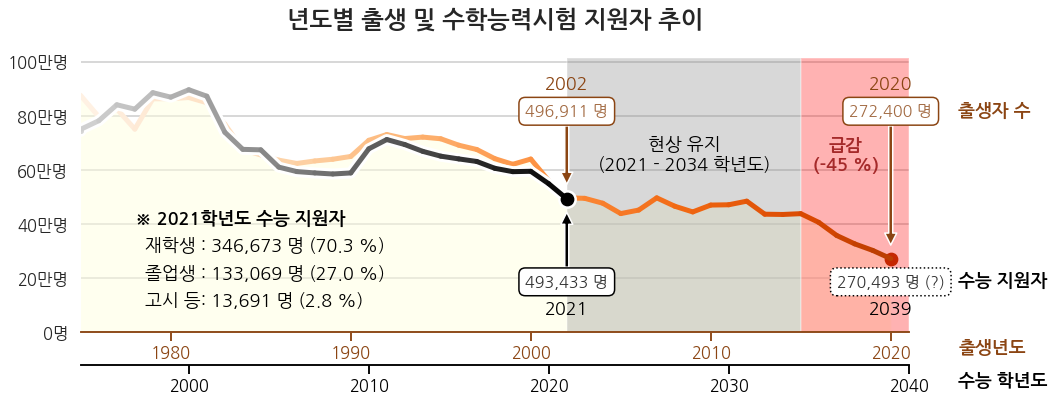

In [21]:
# step 15-2. 향후 10년간 박스권 표현
from matplotlib import cm

fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")

# axes 추가
ax_sn = ax.twiny()

# 출생자 수
color_birth = "saddlebrown"
ax.fill_between(df_birth["year"], df_birth["num_birth"], fc="lightyellow", alpha=0.5)
oranges = cm.get_cmap("Oranges", lut=df_birth.shape[0]*1.2)
for i, alpha in enumerate(range(df_birth.shape[0]-1)):
    ax.plot(df_birth.loc[i: i+1, "year"], df_birth.loc[i:i+1, "num_birth"], c=oranges(i), lw=5)
ax.scatter(df_birth["year"].tail(1), df_birth["num_birth"].tail(1), s=150, c=[oranges(df_birth.shape[0])])
    
# 수능 지원자 수
color_sn = "k"
greys = cm.get_cmap("Greys", lut=df_sn.shape[0] + 10)
for i, alpha in enumerate(range(df_sn.shape[0]-1)):
    ax_sn.plot(df_sn.loc[i: i+1, "year"], df_sn.loc[i:i+1, "apply"], c=greys(i + 10), lw=5, zorder=3)
ax_sn.scatter(df_sn["year"].tail(1), df_sn["apply"].tail(1), s=150, c=color_sn, zorder=3.1)

# 수능 지원자 수 윤곽선
ax_sn.plot(df_sn["year"], df_sn["apply"], c="w", lw=11, zorder=2)
ax_sn.scatter(df_sn["year"].tail(1), df_sn["apply"].tail(1), s=300, c="w", zorder=2)

# spines 정리
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)
    ax_sn.spines[s].set_visible(False)

# 출생 x, y축 범위 지정
ax.set_xlim(1975, 2021)
ax.set_ylim(0, )    

# 수능 x, y 축 범위 지정
offset_sn = 19
ax_sn.set_xlim(1975+offset_sn, 2021+offset_sn)
    
# grid 추가
ax.grid(axis="y")

# 출생년도 bottom spine 색상을 line plot과 통일
ax.spines["bottom"].set_edgecolor(color_birth)
ax.tick_params(axis="x", color=color_birth, labelcolor=color_birth)

# 수능 학년도 xticks를 bottom으로 이동
ax_sn.xaxis.set_ticks_position("bottom")

# 수능 학년도 bottom spine을 아래로 이동, 수능 곡선 색상과 통일
ax_sn.spines["bottom"].set_position(("axes", -0.12))
ax_sn.spines["bottom"].set_edgecolor(color_sn)
ax_sn.tick_params(color=color_sn, labelcolor=color_sn)

# yticklabels
yticks = list(np.linspace(0, 1e6, 6))
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y/1e4)}만명" if y > 0 else "0명" for y in yticks])

# xticklabels
font_xlabel = {"fontsize":18, "ha":"left", "fontweight":"bold"}
ax.text(1.06, -0.075, "출생년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)
ax.text(1.06, -0.195, "수능 학년도", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

# title
ax.set_title("년도별 출생 및 수학능력시험 지원자 추이", fontsize=24, fontweight="bold", pad=32)

# 2002년(index 29), 2020년(index 47) 출생자 데이터 추가
font_annot = {"ha":"center", "fontsize":16, "color":"k", "alpha":0.8}
font_textyear = {"fontsize": 18, "ha":"center"}
annot_birth_y = 8e5
annot_birth_offset = 5e4
annot_birth_yearoffset = 1e5
for idx in [29, 47]:
    # 출생자
    ax.annotate(format(df_birth.loc[idx, "num_birth"], ",") + " 명", 
                xy=(df_birth.loc[idx, "year"], df_birth.loc[idx, "num_birth"]+annot_birth_offset), 
                xytext=(df_birth.loc[idx, "year"], annot_birth_y),
                arrowprops={"facecolor":color_birth},
                bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":color_birth},
                ha="center", fontsize=16, 
                color=color_birth, alpha=0.8
               )
    ax.text(df_birth.loc[idx, "year"], 
            annot_birth_y + annot_birth_yearoffset, 
            str(df_birth.loc[idx, "year"]), 
            transform=ax.transData, 
            fontdict=font_textyear, 
            color=color_birth)

# 출생자 수 legend    
ax.text(1.06, 0.79, "출생자 수", transform=ax.transAxes, fontdict=font_xlabel, color=color_birth)

# 2021학년도 수능 지원자 추가
annot_sn_y = 17e4
annot_sn_offset = -5e4
annot_sn_year_offset = -1e5
ax_sn.annotate(format(df_sn.loc[28, "apply"], ",") + " 명", 
               xy=(df_sn.loc[28, "year"], df_sn.loc[28, "apply"]+annot_sn_offset), 
               xytext=(df_sn.loc[28, "year"], annot_sn_y),
               arrowprops={"facecolor":color_sn},
               bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":color_sn},
               ha="center", fontsize=16, 
               color=color_sn, alpha=0.8
              )
ax_sn.text(2021, 
           annot_sn_y + annot_sn_year_offset, 
           "2021", 
           transform=ax_sn.transData, 
           fontdict=font_textyear, 
           color=color_sn)

# 2002년에서 2020년까지 출생자 감소율
delta_birth_ratio = df_birth.loc[47, "num_birth"]/df_birth.loc[29, "num_birth"]

# 2039학년도 예상 수능 지원자 수
apply_2039 = int(df_sn.loc[28, "apply"] * delta_birth_ratio)

# 2039학년도 예상 수능 지원자 추가
ax_sn.annotate(f"{format(apply_2039, ',')} 명 (?)", 
               xy=(2039, df_birth.loc[47, "num_birth"] + annot_sn_offset), 
               xytext=(2039, annot_sn_y),
               arrowprops={"facecolor":color_sn},
               bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":color_sn, "ls":":"},
               ha="center", fontsize=16, 
               color=color_sn, alpha=0.8
              )
ax_sn.text(2039, 
           annot_sn_y + annot_sn_year_offset, 
           "2039", 
           transform=ax_sn.transData, 
           fontdict=font_textyear, 
           color=color_sn)

# 수능 지원자 legend
ax.text(1.06, 0.17, "수능 지원자", transform=ax.transAxes, fontdict=font_xlabel, color=color_sn)

# 박스권 등락 추가
ax.axvspan(2002, 2015, fc="gray", alpha=0.3)
ax.text(2008.5, 6e5, "현상 유지\n(2021 - 2034 학년도)", fontdict=font_textyear, color="k")

# 2034년 후 급락
ax.axvspan(2015, 2021, fc="r", alpha=0.3)
ax.text(2017.5, 6e5, "급감\n(-45 %)", fontdict=font_textyear, color="brown", fontweight="bold")

# 2021년도 지원자 중 비율 표기
num_enroll = format(df_sn['enroll'].iloc[-1], ',')
num_grad = format(df_sn['grad'].iloc[-1], ',')
num_ged = format(df_sn['ged'].iloc[-1], ',')

font_category = {"fontsize":18, "ha":"left", "color":"k"}
ax_sn.text(1997, 4e5, "※ 2021학년도 수능 지원자", fontdict=font_category, fontweight="bold") 
ax_sn.text(1997, 3e5, 
           f"  재학생 : {num_enroll} 명 ({df_sn['enroll'].iloc[-1]/df_sn['apply'].iloc[-1]*100:.1f} %)", 
           fontdict=font_category)
ax_sn.text(1997, 2e5, 
           f"  졸업생 : {num_grad} 명 ({df_sn['grad'].iloc[-1]/df_sn['apply'].iloc[-1]*100:.1f} %)", 
           fontdict=font_category)
ax_sn.text(1997, 1e5, 
           f"  고시 등: {num_ged} 명 ({df_sn['ged'].iloc[-1]/df_sn['apply'].iloc[-1]*100:.1f} %)", 
           fontdict=font_category)

fig.tight_layout()
fig.savefig("64_kr_pop_sn_17.png")

In [22]:
fig.savefig("fIII-6-4.png", dpi=600)